1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

A Classification Decision Tree is used for solving classification problems, where the goal is to assign a label or category to input data based on its features. These problems typically involve predicting discrete outcomes (e.g., "Yes" or "No," or one of several categories).
Examples of real-world applications:
Medical diagnosis: Predicting whether a patient has a specific disease based on symptoms and test results.
Email filtering: Classifying emails as "Spam" or "Not Spam."

A Classification Decision Tree makes predictions by sequentially splitting data based on feature values. Here’s the process:
Start at the root node with all data points.
At each internal node, choose a feature and a threshold or category to split the data into subsets. The choice is made to maximize the separation of categories (using criteria like Gini Impurity or Information Gain).
Repeat this process until reaching a leaf node, where each subset ideally contains only one class. The leaf node assigns a class label (e.g., "Yes" or "No").
For new data, follow the splits through the tree until reaching a leaf node, which gives the predicted class.

Decision Trees:
Use a hierarchical, non-linear approach.
Predictions are based on a series of binary decisions at nodes, creating splits.
Best suited for classification tasks or regression tasks with non-linear relationships.
Multiple Linear Regression:
Uses a linear model to predict a continuous output.
Predictions are made by calculating a weighted sum of input features plus an intercept term.
Best suited for regression tasks involving linear relationships.

Each split in a Decision Tree can be thought of as modeling an interaction between features, as decisions at one node depend on prior splits. This allows trees to naturally capture complex, non-linear relationships without explicitly defining interaction terms (unlike regression models where interactions must be predefined).

summary: ChatBot Interaction Summary: Understanding Classification Decision Trees
Part (a): Purpose and Applications of Classification Decision Trees

Purpose: Classification Decision Trees address classification problems, where the goal is to predict discrete outcomes (e.g., categories or labels).
Examples of Applications:
Medical diagnosis (e.g., predicting diseases based on symptoms).
Email filtering (e.g., "Spam" vs. "Not Spam").
Customer segmentation (e.g., grouping based on purchasing behavior).
Loan approval (e.g., accept or reject based on financial details).
Part (b): Comparison with Multiple Linear Regression

How Decision Trees Make Predictions:

Data is split sequentially at nodes based on feature values, aiming to maximize category separation (e.g., using Gini Impurity or Information Gain).
Splitting continues until reaching a leaf node that predicts a class label.
For new data, the tree is traversed based on feature values until a final classification is made.
Key Differences from Multiple Linear Regression:

Decision Trees are hierarchical and non-linear, making sequential decisions to classify data.
Multiple Linear Regression uses a linear formula to predict continuous outcomes by calculating a weighted sum of input features.
Decision Trees inherently capture feature interactions, while linear regression requires interactions to be predefined.
Additional Insights:

Decision Trees’ sequential decisions at nodes can be viewed as modeling feature interactions, making them powerful for capturing complex, non-linear relationships.

limk: https://chatgpt.com/share/673faeb7-fc18-800d-9d7f-d1c03a11b5b5

2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

1. Accuracy
Definition: The proportion of true results (true positives and true negatives) out of all predictions.
It is considered when both true or false results matter. It's used when the dataset is balanced, meaning there are roughly equal numbers of positive and negative cases, and when the costs of false positives and false negatives are similar.
Real-World Application:
General Screening Tools: Evaluating the performance of a weather prediction model (e.g., predicting if it will rain or not).
Rationale: Accuracy is useful when the costs of false positives and false negatives are equal and the classes are balanced. For instance, predicting rain doesn’t heavily favor one type of misclassification over the other.

2. Sensitivity (Recall)
Definition: The proportion of actual positives correctly identified.
Often considered when true result matters more than false result. It's used when missing a positive case (false negative) is far more costly than a false positive and we want to detect all true positives.
Real-World Application:
Medical Diagnostics (e.g., Cancer Detection): Detecting patients with cancer in a screening test.
Rationale: Sensitivity is critical in scenarios where missing a positive case is far more severe than a false alarm. For instance, failing to detect cancer can delay treatment with potentially fatal consequences.

3. Specificity
Definition: The proportion of actual negatives correctly identified.
Oppisite to specificity, considered when false result matters. We want to find all negative values.
Real-World Application:
Spam Email Filtering: Ensuring that legitimate (non-spam) emails are not flagged as spam.
Rationale: Specificity is important when false positives (incorrectly classifying something negative as positive) have a significant cost or inconvenience, such as losing important emails due to over-aggressive spam filters.

4. Precision
Definition: The proportion of positive identifications that are actually correct. It's used when you care about
the reliability of positive predictions.
Real-World Application:
Fraud Detection in Banking: Flagging fraudulent transactions.
Rationale: Precision is key when false positives (flagging legitimate transactions as fraudulent) carry significant costs, such as inconveniencing customers or damaging trust.

Key Takeaways:
Accuracy: Best when classes are balanced and costs of errors are similar.
Sensitivity: Critical when missing positives is unacceptable (e.g., life-threatening conditions).
Specificity: Important when avoiding false positives is more valuable (e.g., reducing inconvenience or cost).
Precision: Vital when you want your positive predictions to be highly reliable (e.g., fraud detection).

summary: Key Insights
Accuracy: Best for balanced datasets with similar error costs.
Sensitivity: Prioritizes detecting all positives, even at the expense of false positives.
Specificity: Focuses on minimizing false positives, ensuring negative predictions are reliable.
Precision: Ensures positive predictions are highly accurate, minimizing false alarms.
This discussion highlighted the distinct decision-making contexts supported by each metric and provided memorable examples to illustrate their applications.

link: https://chatgpt.com/share/673faeb7-fc18-800d-9d7f-d1c03a11b5b5

3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove specified columns (Weight_oz, Width, Height)
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")

# Step 2: Drop rows with NaN entries in the remaining columns
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert 'Pub year' and 'NumPages' to integers, and 'Hard_or_Paper' to category
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display the processed dataset and its basic info
ab_reduced_noNaN_info = {
    "First Rows": ab_reduced_noNaN.head(),
    "Dataset Shape": ab_reduced_noNaN.shape,
    "Summary Statistics": ab_reduced_noNaN.describe(include="all")
}

import ace_tools as tools; tools.display_dataframe_to_user(name="Amazon Books Cleaned Dataset", dataframe=ab_reduced_noNaN)


/tmp/ipykernel_71/2820601351.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_71/2820601351.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_71/2820601351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

ModuleNotFoundError: No module named 'ace_tools'

4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Reporting the number of observations in each set
print("Number of observations in the training set:", len(ab_reduced_noNaN_train))
print("Number of observations in the test set:", len(ab_reduced_noNaN_test))


Number of observations in the training set: 255
Number of observations in the test set: 64


y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']: This converts the categorical variable Hard_or_Paper into a binary format using one-hot encoding. Specifically, it creates a new variable y that equals 1 if the book is "Hardcover" ('H') and 0 otherwise.

X = ab_reduced_noNaN[['List Price']]: This selects the List Price column from the dataset as the feature (input variable) for the model. X is a DataFrame that will be used for training and testing.



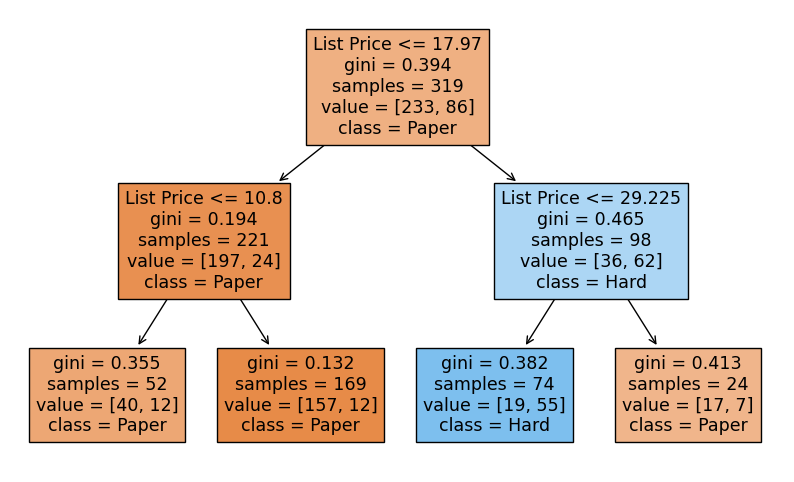

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Preparing the data for training
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Initializing and training the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualizing the tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()


 Explaining the Predictions
The decision tree visualization (tree.plot_tree) shows the following:
Nodes represent decision points based on the List Price.
Each split divides the data into subsets based on thresholds of the List Price feature.
Terminal nodes (leaves) show the predicted class (Paper or Hard) and the probability of that class.
For instance:
If the List Price is less than a certain threshold, the model predicts Paper.
If the List Price exceeds that threshold, the model may predict Hard based on further splits or probabilities.

summary: Train-Test Split:

Discussed how to create an 80/20 split of a dataset using train_test_split.
Provided code to split the dataset into training and testing sets (ab_reduced_noNaN_train and ab_reduced_noNaN_test) and to report the number of observations in each.
Understanding the Data Preparation Steps:

Explained y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']: Converts the categorical variable Hard_or_Paper into a binary format for model training (1 for hardcover and 0 for paperback).
Explained X = ab_reduced_noNaN[['List Price']]: Extracts the List Price column as the feature for model training.
Training a Decision Tree:

Provided code to initialize and train a DecisionTreeClassifier (clf) using the List Price variable to predict whether a book is hardcover or paperback. The tree’s max_depth was set to 2.
Visualizing the Decision Tree:

Provided code using tree.plot_tree to visualize the decision-making process of the model, showing splits based on List Price thresholds and terminal nodes with class predictions.
Interpreting the Decision Tree:

Summarized how the tree predicts hardcover or paperback based on the splits in List Price and the probabilities in the terminal nodes.

5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

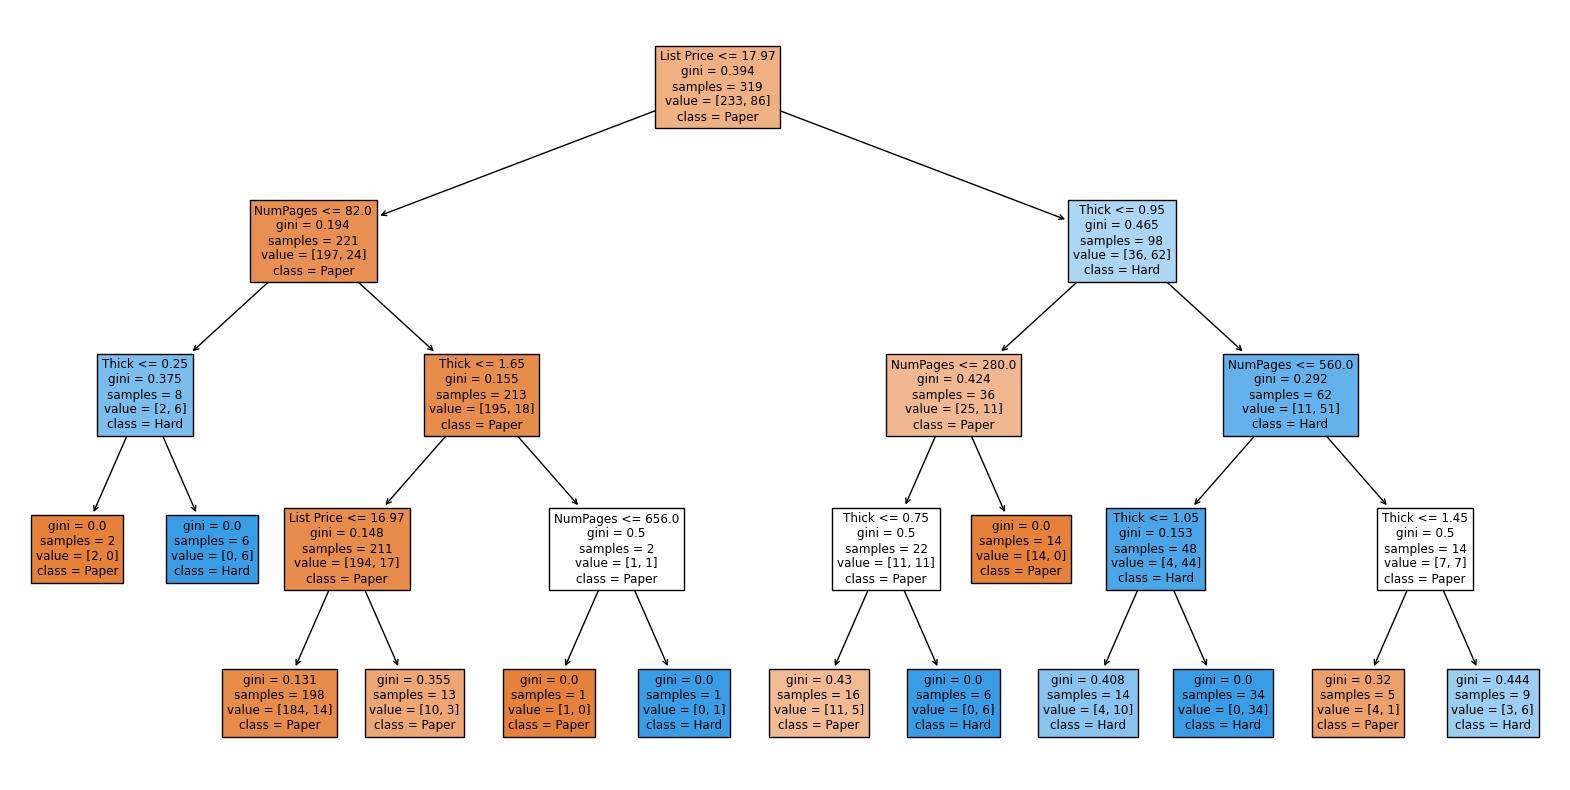

Best max_depth: 5
Best accuracy: 0.8654761904761905


In [6]:
# Defining X and y
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Initialize and train the model
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Simple tree visualization
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 3, 4, 5, 6]}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X, y)

# Best parameters
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best accuracy:", grid_search.best_score_)


Explanation of Predictions
The decision tree makes predictions by:

Splitting data at decision nodes based on the predictor variables (NumPages, Thick, List Price).
At each node, the tree compares the feature values against thresholds learned during training.
The process continues until it reaches a terminal node (leaf), where it assigns a class (Paper or Hard) based on the majority class of the training samples in that node.
max_depth=4 limits the tree to four levels, controlling complexity and avoiding overfitting.
For example:

If NumPages is less than a certain threshold, the tree may further split based on Thick or List Price.
If all conditions lead to a leaf node where most samples are Hard, it predicts Hard.

summary: Objective:

Train a classification decision tree (clf2) using the predictor variables NumPages, Thick, and List Price to classify whether a book is hardcover or paperback.
Set the tree’s max_depth to 4 and use the same 80/20 train-test split created earlier.
Steps Provided:

Data Preparation: Defined X to include the specified predictors and y as the binary target variable (Hard_or_Paper).
Model Training: Demonstrated how to initialize and train a DecisionTreeClassifier (clf2) with max_depth=4.
Visualization:
Provided code for a simpler tree visualization using tree.plot_tree.
Suggested using graphviz for a detailed and more readable tree diagram.
Prediction Explanation:
Explained how the decision tree splits data at nodes based on feature thresholds.
Described how predictions are made at terminal nodes using the majority class of the samples in that leaf.
Bonus:

Introduced GridSearchCV to find the optimal value for max_depth, improving the tree's performance by testing different values and selecting the one that maximizes accuracy.

6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict using the test set for both models
y_true = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrices
cm_clf = confusion_matrix(y_true, y_pred_clf)
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

# Extract values for sensitivity, specificity, and accuracy
def compute_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / cm.sum()

    return np.round([sensitivity, specificity, accuracy], 3)

metrics_clf = compute_metrics(cm_clf)
metrics_clf2 = compute_metrics(cm_clf2)

# Report results
print("Confusion Matrix for clf:\n", cm_clf)
print("Sensitivity, Specificity, Accuracy for clf:", metrics_clf)

print("\nConfusion Matrix for clf2:\n", cm_clf2)
print("Sensitivity, Specificity, Accuracy for clf2:", metrics_clf2)


Confusion Matrix for clf:
 [[40  4]
 [ 3 17]]
Sensitivity, Specificity, Accuracy for clf: [0.85  0.909 0.891]

Confusion Matrix for clf2:
 [[42  2]
 [ 2 18]]
Sensitivity, Specificity, Accuracy for clf2: [0.9   0.955 0.938]


For each model:

The confusion matrix shows counts for TP, TN, FP, and FN.
The sensitivity measures how well the model identifies hardcover books.
The specificity measures how well the model identifies paperback books.
The accuracy provides an overall performance score.

summary: Summary of the Conversation:
Objective:

Evaluate two classification models (clf and clf2) using their confusion matrices.
Calculate and report sensitivity, specificity, and accuracy for both models.
Key Concepts:

Positive (P): Predicted as hardcover (Hard, 1).

Negative (N): Predicted as paperback (Paper, 0).

Confusion Matrix:

True Positive (TP): Correctly predicted hardcover.
True Negative (TN): Correctly predicted paperback.
False Positive (FP): Incorrectly predicted hardcover (actually paperback).
False Negative (FN): Incorrectly predicted paperback (actually hardcover).

Implementation:

Used the test dataset (ab_reduced_noNaN_test) for predictions.
Computed confusion matrices for clf and clf2.
Extracted metrics using a helper function to calculate sensitivity, specificity, and accuracy, rounded to three decimal places.
Output:

Reported the confusion matrix for each model.
Displayed the calculated sensitivity, specificity, and accuracy for clf and clf2.

link4-6: https://chatgpt.com/share/673fbab9-664c-800d-8cf8-8bf6ec8acbc4

7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

The two confusion matrices differ because the first model (clf) uses only one feature (List Price) to make predictions, while the second model (clf2) uses three features (NumPages, Thick, and List Price). By incorporating more features, clf2 has access to additional information, allowing it to capture more complex patterns and improve prediction accuracy. Both models were trained on clean data without missing values, ensuring reliable and consistent results. The broader feature set used by clf2 leads to better classification performance, as shown by its confusion matrix with fewer misclassifications.